In [6]:

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import hvplot.pandas
import plotly.express as px
import seaborn as sns

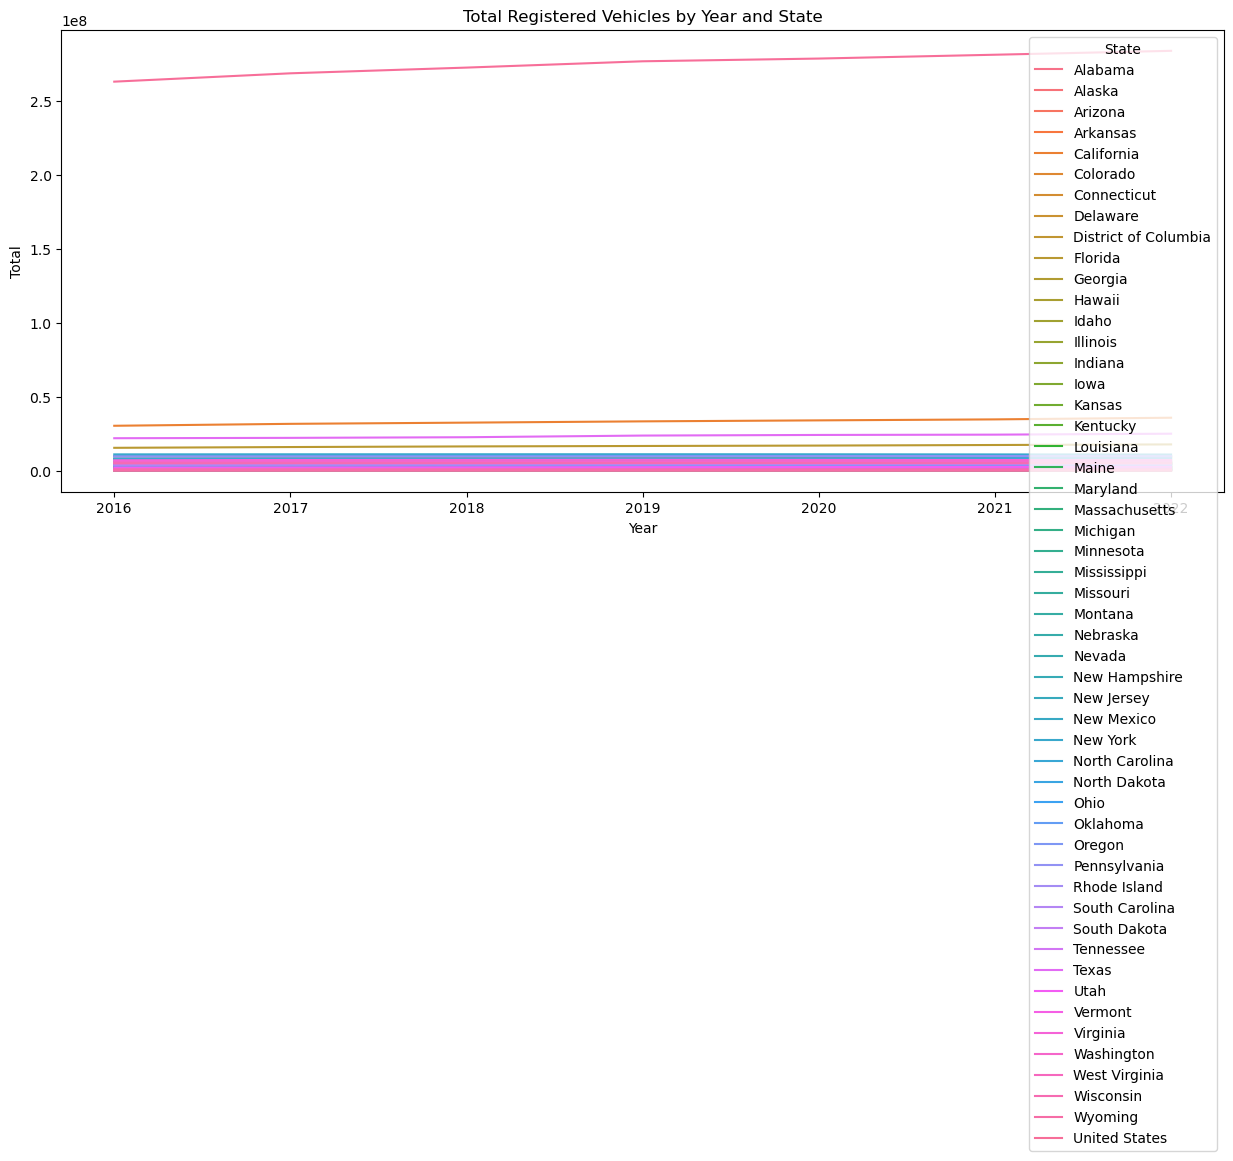

In [7]:
df = pd.read_csv('../data/cleaned_data.csv')
df['Total'] = df.iloc[:, 2:].sum(axis=1)
plt.figure(figsize=(15, 6))
sns.lineplot(data=df, x='Year', y='Total', hue='State')
plt.title('Total Registered Vehicles by Year and State')
plt.show()

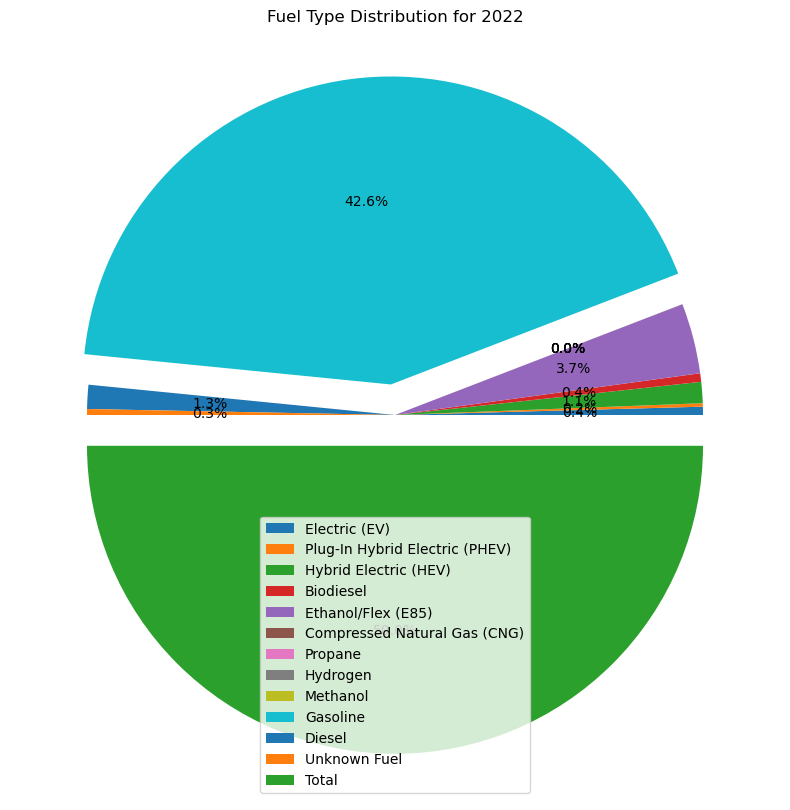

In [9]:
year_data = df[df['Year'] == 2022].sum(numeric_only=True)
year_data = year_data.drop('Year')

# Explode slices which are above a certain threshold, for better visualization.
explode = (year_data > year_data.sum() * 0.05).astype(float) * 0.1

# Plotting the pie chart with the exploded slices, and using a legend instead of labels on the pie.
ax = year_data.plot.pie(autopct='%.1f%%', figsize=(10, 10), explode=explode, legend=True, labels=None)
plt.title('Fuel Type Distribution for 2022')
plt.ylabel('')  # to remove the label name from the Y-axis
plt.show()


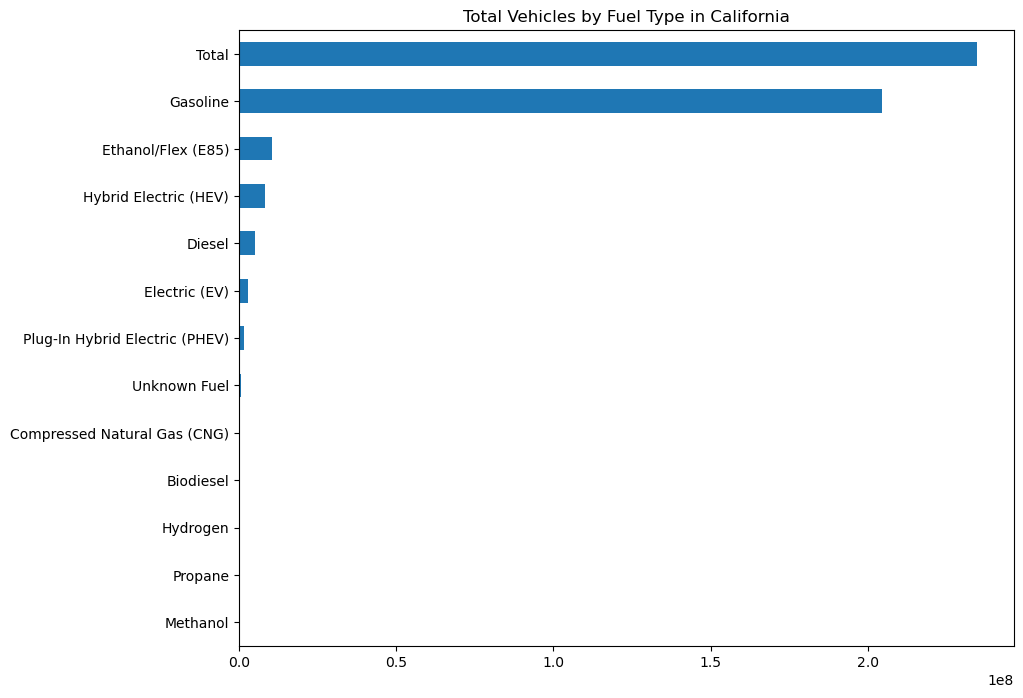

In [10]:
state_data = df[df['State'] == 'California'].sum(numeric_only=True)
state_data = state_data.drop('Year')
state_data.sort_values().plot(kind='barh', figsize=(10, 8))
plt.title('Total Vehicles by Fuel Type in California')
plt.show()


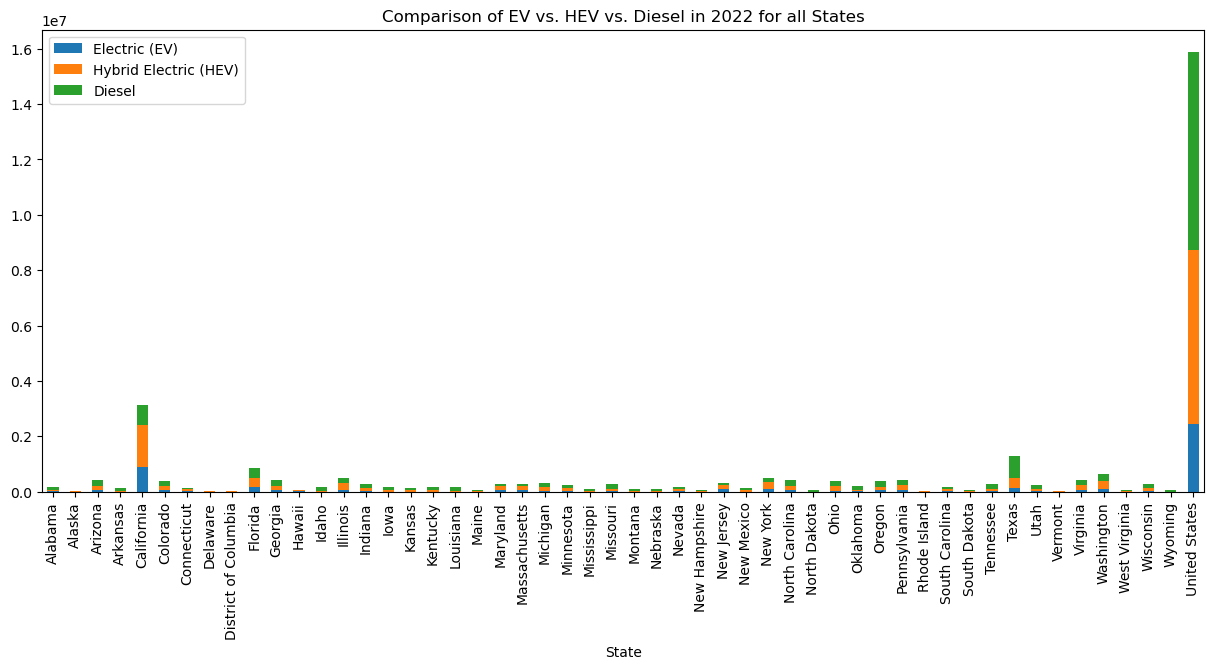

In [11]:
specific_data = df[df['Year'] == 2022][['State', 'Electric (EV)', 'Hybrid Electric (HEV)', 'Diesel']]
specific_data.set_index('State').plot(kind='bar', stacked=True, figsize=(15, 6))
plt.title('Comparison of EV vs. HEV vs. Diesel in 2022 for all States')
plt.show()


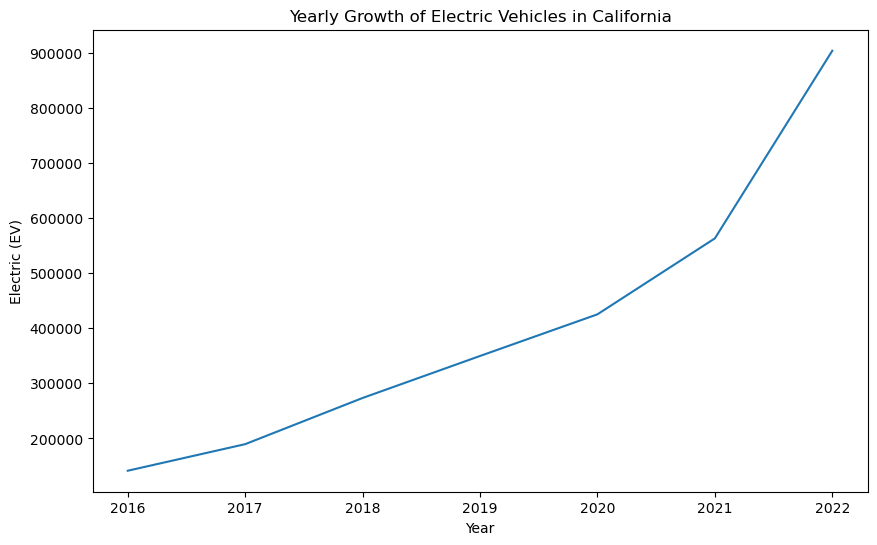

In [12]:
cali_data = df[df['State'] == 'California']
plt.figure(figsize=(10, 6))
sns.lineplot(data=cali_data, x='Year', y='Electric (EV)')
plt.title('Yearly Growth of Electric Vehicles in California')
plt.show()


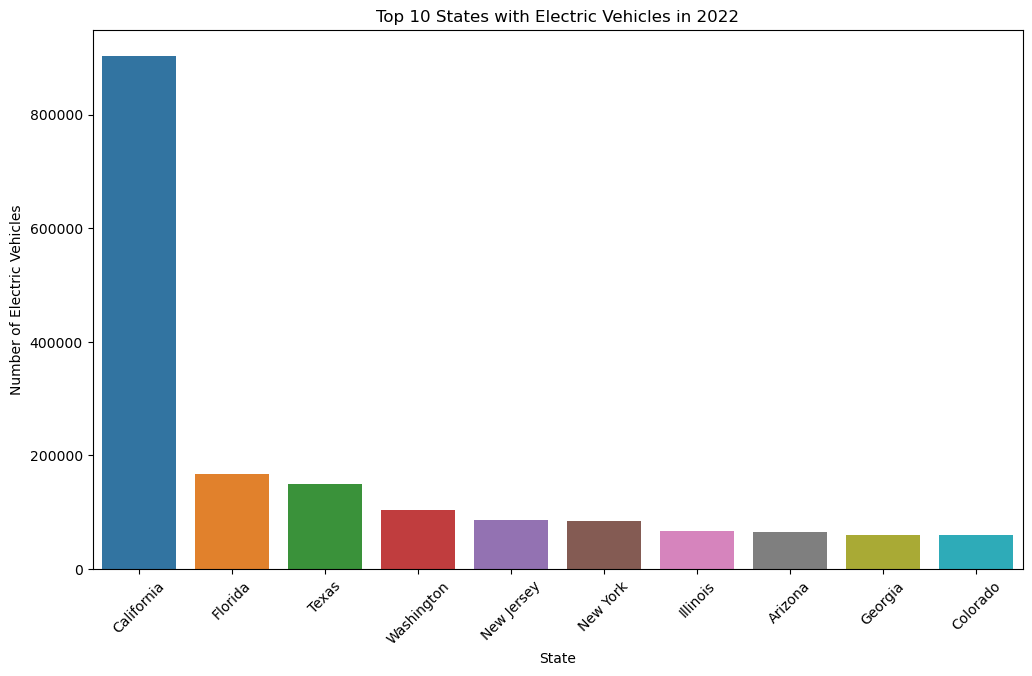

In [14]:
# Filter out the 'United States' row and then sort and get the top 10 states
top_states_ev = df[(df['Year'] == 2022) & (df['State'] != 'United States')].sort_values(by='Electric (EV)', ascending=False).head(10)

plt.figure(figsize=(12, 7))
sns.barplot(data=top_states_ev, x='State', y='Electric (EV)')
plt.title('Top 10 States with Electric Vehicles in 2022')
plt.ylabel('Number of Electric Vehicles')
plt.xticks(rotation=45)
plt.show()


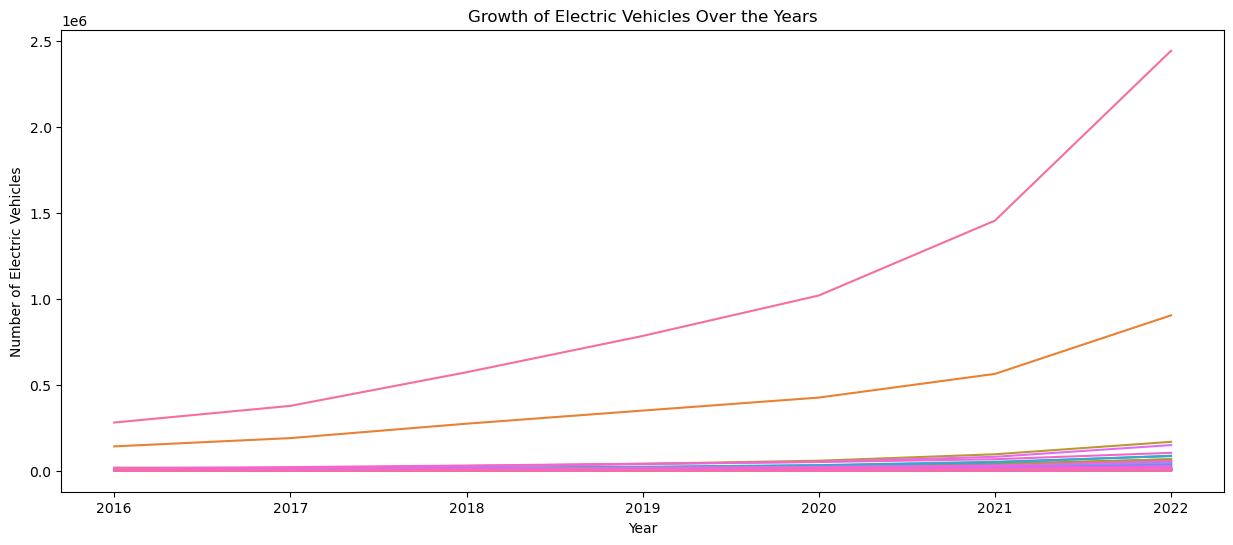

In [15]:
plt.figure(figsize=(15, 6))
sns.lineplot(data=df, x='Year', y='Electric (EV)', hue='State', legend=False)  # set legend to False for clarity
plt.title('Growth of Electric Vehicles Over the Years')
plt.ylabel('Number of Electric Vehicles')
plt.show()


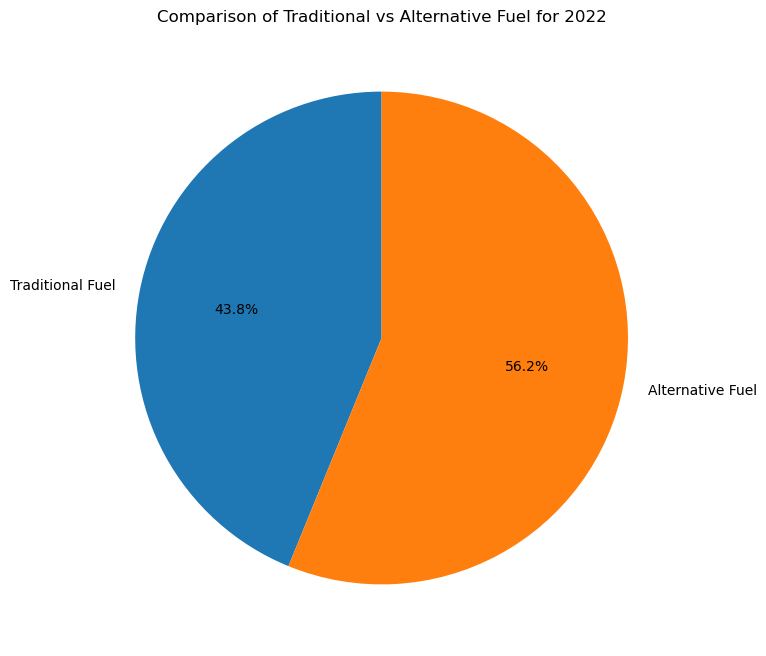

In [16]:
df_2022 = df[df['Year'] == 2022].sum(numeric_only=True)
traditional = df_2022['Gasoline'] + df_2022['Diesel']
alternative = df_2022.sum() - df_2022['Gasoline'] - df_2022['Diesel'] - df_2022['Year']

labels = ['Traditional Fuel', 'Alternative Fuel']
sizes = [traditional, alternative]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Comparison of Traditional vs Alternative Fuel for 2022')
plt.show()


/var/folders/zw/kqxgh3ws15l27fz7ytgbylgm0000gn/T/ipykernel_28509/3804855825.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


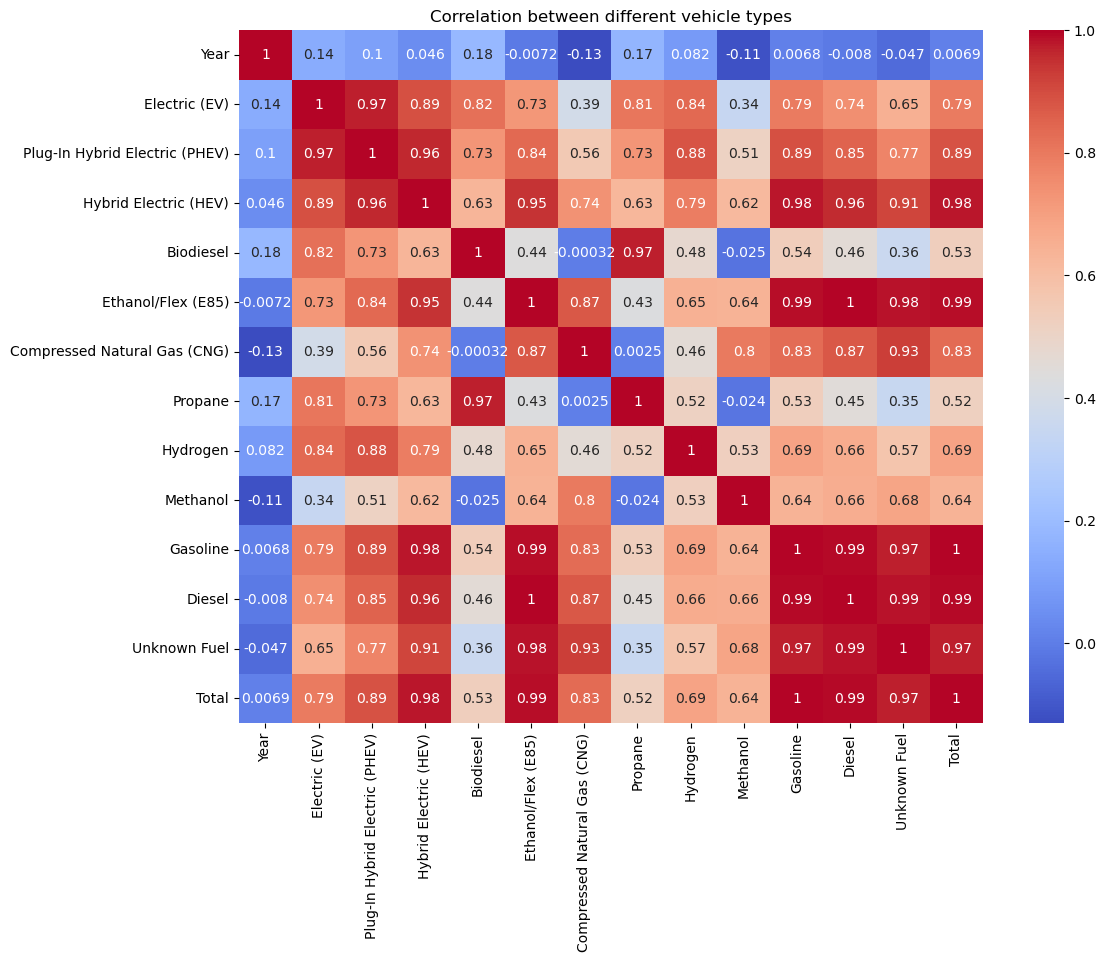

In [17]:
correlation = df.corr()

plt.figure(figsize=(12, 9))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between different vehicle types')
plt.show()
